THEORETICAL QUESTIONS
1. What is Unsupervised Learning?

Unsupervised learning is a type of machine learning where the model learns patterns from unlabeled data. It tries to find hidden structures, relationships, or clusters in the data without predefined outputs.

2. How does K-Means clustering algorithm work?

K-Means works in the following steps:

Choose number of clusters (K).

Initialize K centroids randomly.

Assign each data point to the nearest centroid.

Recalculate centroids as the mean of assigned points.

Repeat until centroids stop changing.

3. What is a dendrogram?

A dendrogram is a tree-like diagram used in hierarchical clustering to show how clusters are merged or split at different distances.

4. Difference between K-Means and Hierarchical Clustering
K-Means	Hierarchical
Need to specify K	No need to specify K initially
Faster for large data	Slower for large data
Flat clusters	Tree-based clusters
5. Advantages of DBSCAN over K-Means

Detects arbitrary shaped clusters

Identifies noise points

No need to specify number of clusters

6. When to use Silhouette Score?

Silhouette Score is used to evaluate clustering quality. It measures how similar a point is to its own cluster compared to other clusters.

7. Limitations of Hierarchical Clustering

Computationally expensive

Not suitable for very large datasets

Difficult to decide optimal cluster cut

8. Why is feature scaling important in K-Means?

Because K-Means uses distance (Euclidean distance). Without scaling, features with large values dominate clustering.

9. How does DBSCAN identify noise?

Points that do not have minimum required neighbors within a specified radius (eps) are marked as noise.

10. Define inertia in K-Means

Inertia is the sum of squared distances between data points and their assigned centroid.

11. What is the Elbow Method?

It is used to find optimal K. We plot K vs inertia and find the “elbow point” where inertia decreases slowly.

12. What is density in DBSCAN?

Density refers to number of points within a given radius (eps). High-density regions form clusters.

13. Can hierarchical clustering be used on categorical data?

Yes, but distance metrics must be appropriate (e.g., Hamming distance).

14. What does negative Silhouette Score mean?

It indicates that data points may be assigned to the wrong cluster.

15. What is linkage criteria?

It defines how distance between clusters is calculated. Types:

Single linkage

Complete linkage

Average linkage

16. Why K-Means performs poorly on varying cluster sizes?

Because it assumes spherical clusters with similar sizes and densities.

17. Core parameters in DBSCAN

eps → radius

min_samples → minimum neighbors

These control cluster formation.

18. How does K-Means++ improve K-Means?

It selects better initial centroids to reduce poor clustering results.

19. What is Agglomerative Clustering?

It is bottom-up hierarchical clustering where each point starts as its own cluster and merges step by step.

20. Why is Silhouette Score better than inertia?

Because inertia only measures compactness while silhouette measures both separation and compactness.

21. Generate synthetic data with 4 centers using make_blobs

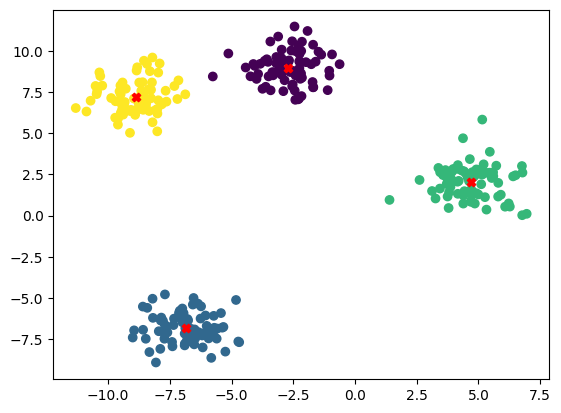

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            color='red', marker='X')
plt.show()

22. Iris + Agglomerative Clustering

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(X)

print(labels[:10])

[1 1 1 1 1 1 1 1 1 1]


23. make_moons + DBSCAN

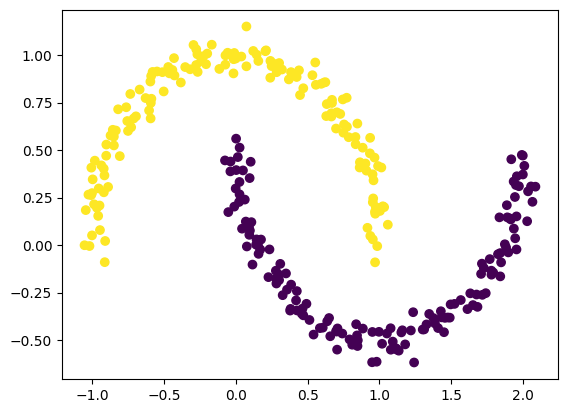

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=300, noise=0.05)

db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

24. Wine + StandardScaler + KMeans

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

print(np.bincount(labels))

[51 66 61]


25. make_circles + DBSCAN

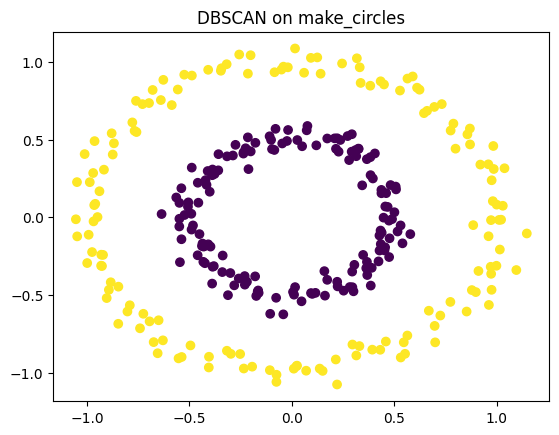

In [1]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=300, noise=0.05, factor=0.5)

db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("DBSCAN on make_circles")
plt.show()

26. Breast Cancer + MinMaxScaler + KMeans

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = data.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)

print("Cluster Centroids:\n", kmeans.cluster_centers_)

Cluster Centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


27. Blobs with varying std + DBSCAN

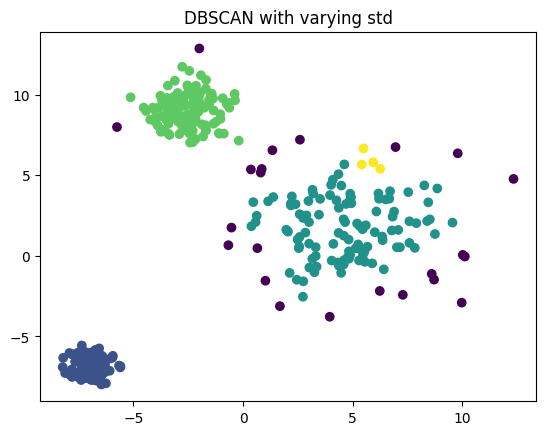

In [3]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=400, centers=3,
                  cluster_std=[1.0, 2.5, 0.5], random_state=42)

db = DBSCAN(eps=1.2, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("DBSCAN with varying std")
plt.show()

28. Digits + PCA (2D) + KMeans

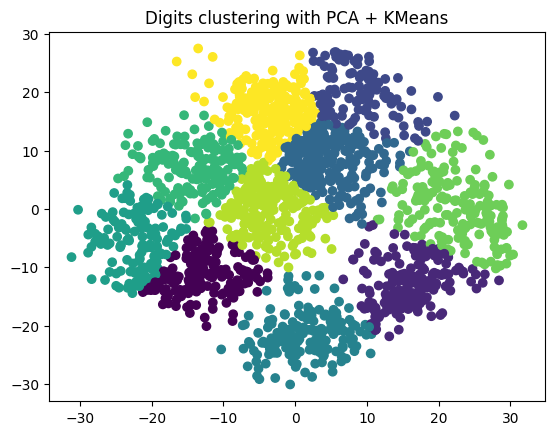

In [4]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = digits.data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10)
labels = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.title("Digits clustering with PCA + KMeans")
plt.show()

29. Silhouette score for k = 2 to 5

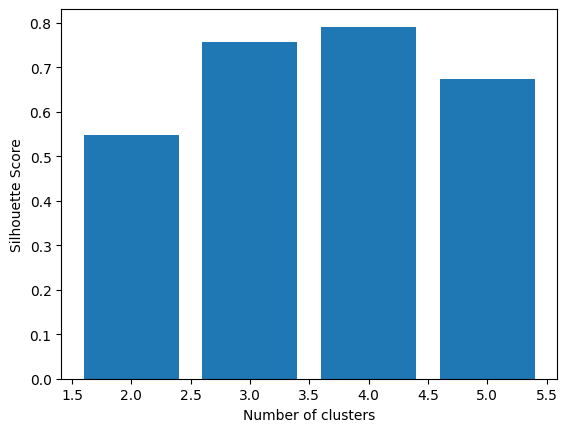

In [5]:
from sklearn.metrics import silhouette_score

scores = []
K = range(2, 6)

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

for k in K:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    scores.append(silhouette_score(X, labels))

plt.bar(K, scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

30. Iris + Hierarchical + Dendrogram

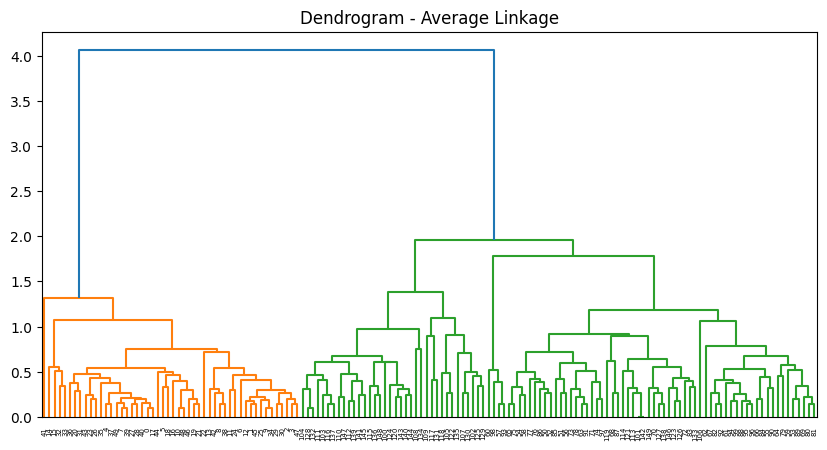

In [6]:
import scipy.cluster.hierarchy as sch
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

plt.figure(figsize=(10,5))
dendrogram = sch.dendrogram(
    sch.linkage(X, method='average')
)
plt.title("Dendrogram - Average Linkage")
plt.show()

31. Overlapping blobs + KMeans decision boundary

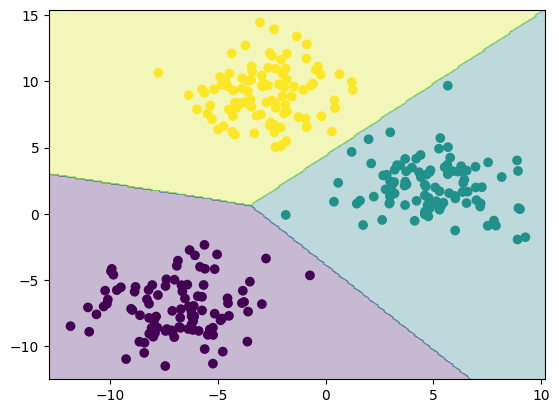

In [7]:
import numpy as np

X, _ = make_blobs(n_samples=300, centers=3,
                  cluster_std=2.0, random_state=42)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1)
)

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.show()

32. Digits + t-SNE + DBSCAN

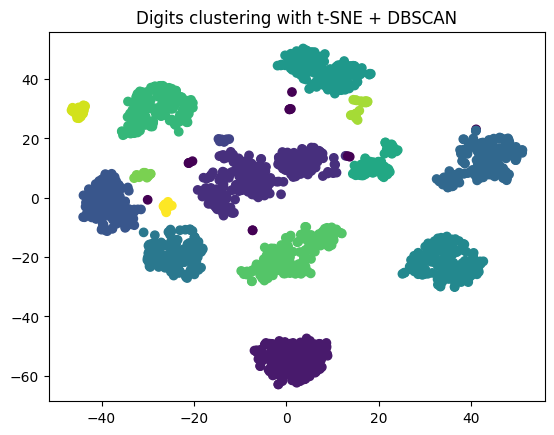

In [8]:
from sklearn.manifold import TSNE

digits = load_digits()
X = digits.data

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

db = DBSCAN(eps=3, min_samples=5)
labels = db.fit_predict(X_tsne)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)
plt.title("Digits clustering with t-SNE + DBSCAN")
plt.show()

33. Blobs + Agglomerative (complete linkage)

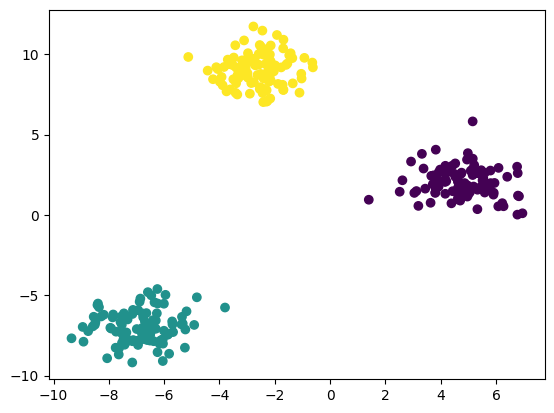

In [9]:
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

model = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = model.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

34. Breast Cancer + Inertia comparison

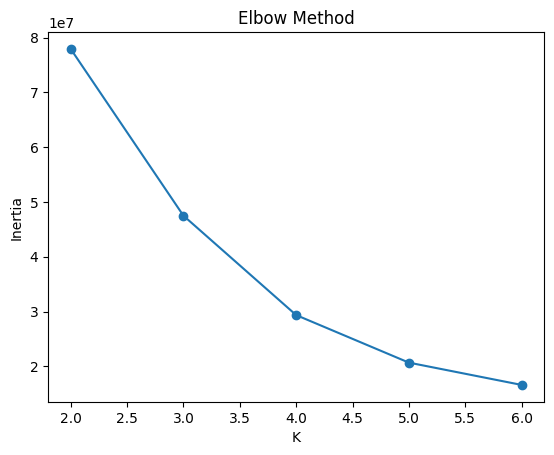

In [10]:
inertia = []
K = range(2,7)

data = load_breast_cancer()
X = data.data

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

35. make_circles + Agglomerative (single linkage)

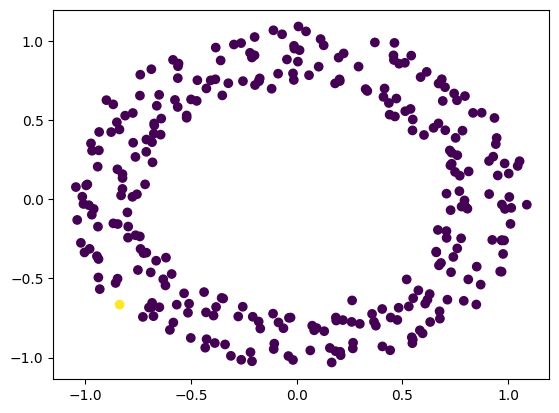

In [11]:
X, _ = make_circles(n_samples=300, noise=0.05)

model = AgglomerativeClustering(
    n_clusters=2, linkage='single'
)

labels = model.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

36. Wine + DBSCAN + cluster count

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import numpy as np

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

db = DBSCAN(eps=1.5, min_samples=5)
labels = db.fit_predict(X)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)

Number of clusters (excluding noise): 0


37. Blobs + KMeans + centers plot

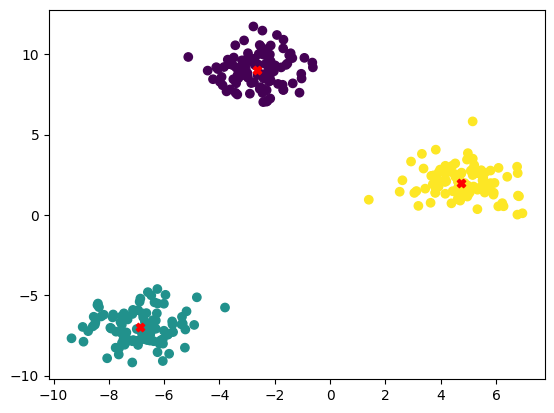

In [13]:
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            color='red', marker='X')
plt.show()

38. Iris + DBSCAN + noise count

In [14]:
iris = load_iris()
X = iris.data

db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X)

noise_points = list(labels).count(-1)
print("Noise samples:", noise_points)

Noise samples: 17


39. make_moons + KMeans

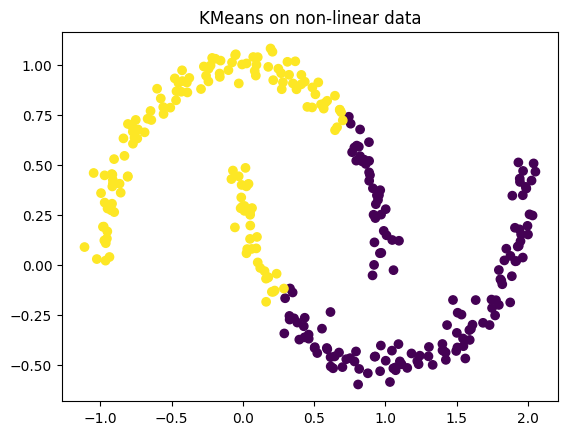

In [22]:

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


X, _ = make_moons(n_samples=300, noise=0.05)

kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("KMeans on non-linear data")
plt.show()

40. Digits + PCA (3D) + KMeans

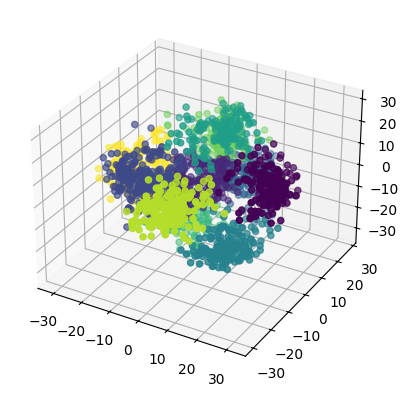

In [16]:
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10)
labels = kmeans.fit_predict(X_pca)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=labels)
plt.show()

41. 5 centers + silhouette score

In [17]:
X, _ = make_blobs(n_samples=300, centers=5, random_state=42)

kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(X)

score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.6387401376125608


42. Breast Cancer + PCA + Agglomerative

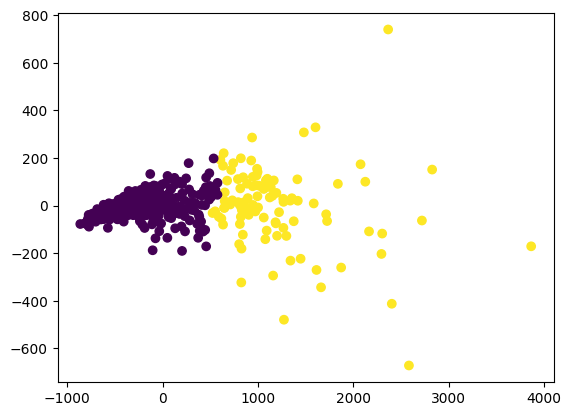

In [18]:
from sklearn.decomposition import PCA

data = load_breast_cancer()
X = data.data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

model = AgglomerativeClustering(n_clusters=2)
labels = model.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.show()

43. KMeans vs DBSCAN side-by-side

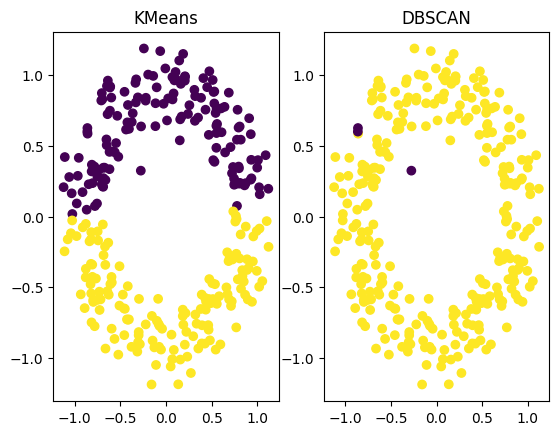

In [19]:
X, _ = make_circles(n_samples=300, noise=0.1)

kmeans = KMeans(n_clusters=2)
km_labels = kmeans.fit_predict(X)

db = DBSCAN(eps=0.2)
db_labels = db.fit_predict(X)

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=km_labels)
plt.title("KMeans")

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=db_labels)
plt.title("DBSCAN")

plt.show()

44. Iris + Silhouette per sample

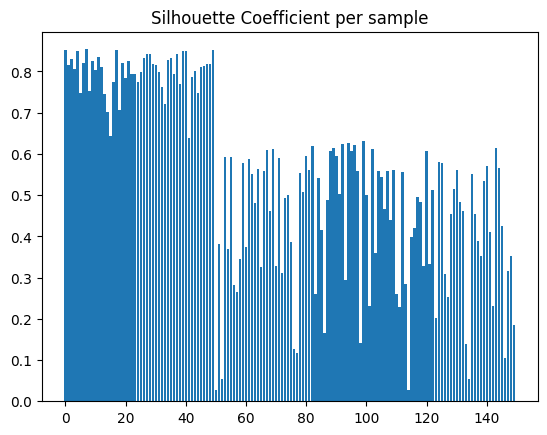

In [20]:
from sklearn.metrics import silhouette_samples

iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

sil_values = silhouette_samples(X, labels)

plt.bar(range(len(sil_values)), sil_values)
plt.title("Silhouette Coefficient per sample")
plt.show()

45. Blobs + Agglomerative (average linkage)

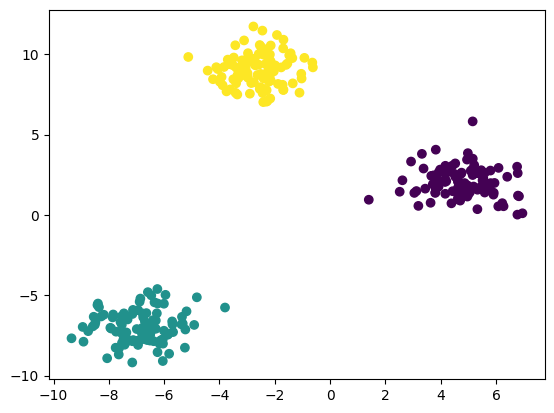

In [21]:
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

model = AgglomerativeClustering(
    n_clusters=3, linkage='average'
)

labels = model.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()